# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [10]:
df = pd.read_csv('data\dataset_part_2.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_12452\4051710069.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('data\dataset_part_2.csv')


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [8]:
# # In case there is problem with dataset that we made, use the dataset from the link below:
# URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# df2 = pd.read_csv(URL)
# df2

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


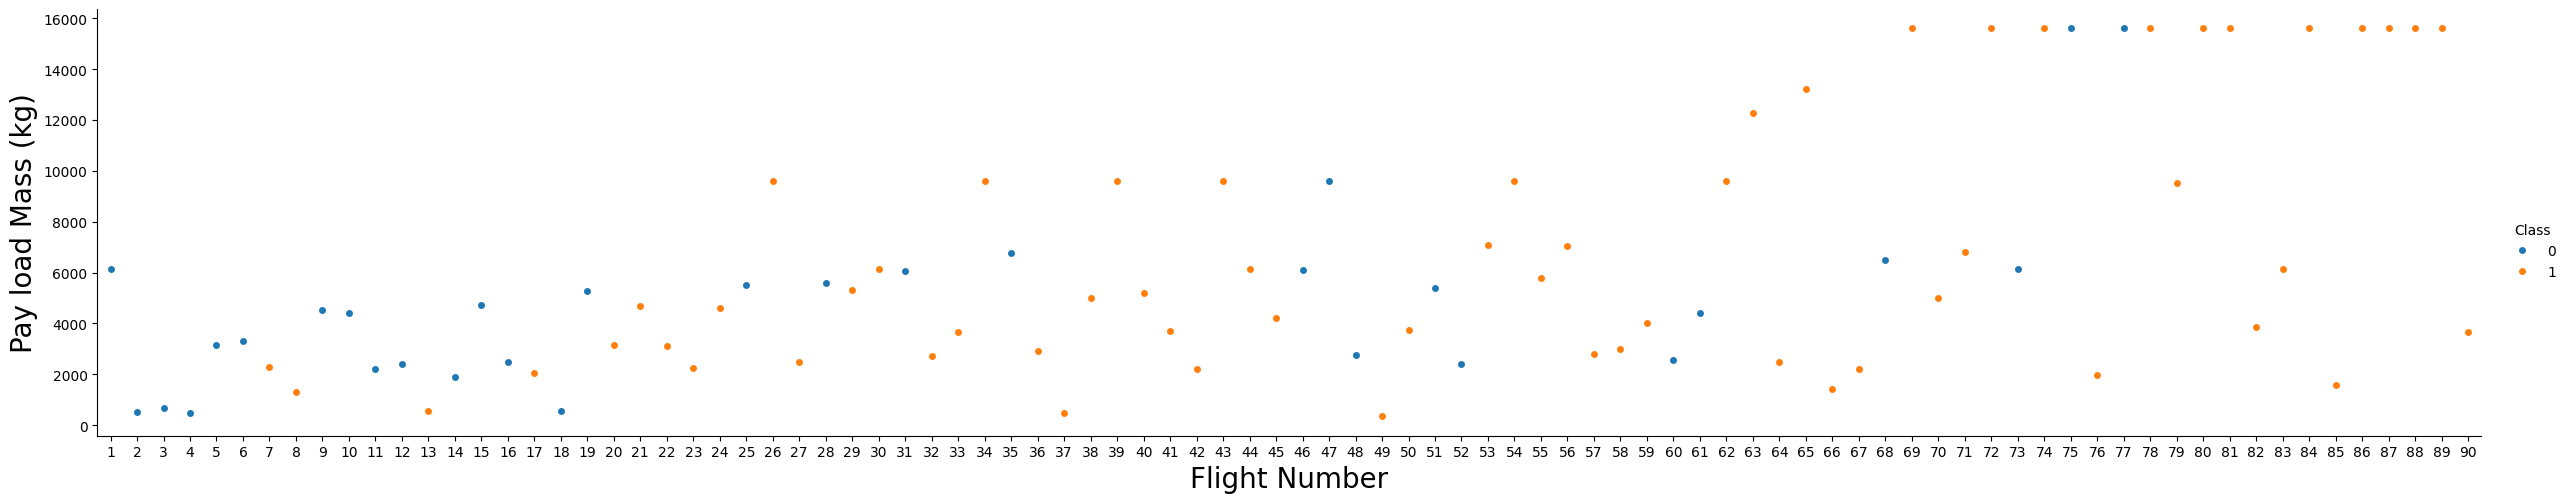

In [9]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


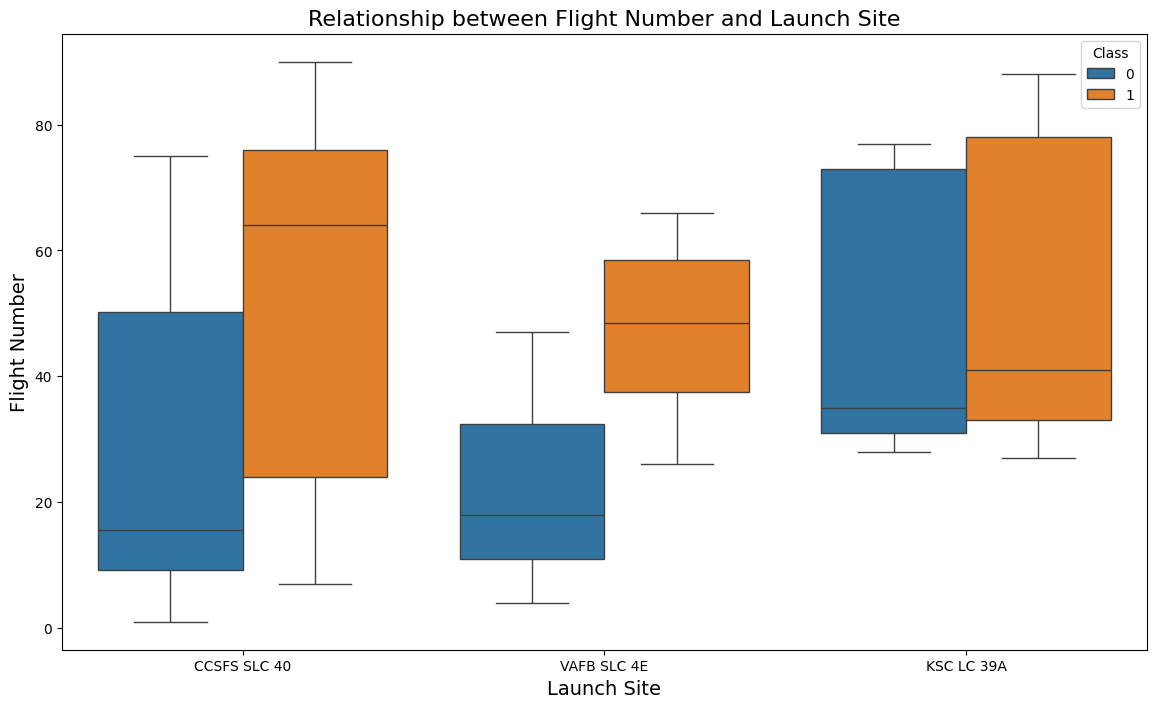

In [11]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

# Create a box plot to visualize the relationship between Flight Number and Launch Site
plt.figure(figsize=(14, 8))
sns.boxplot(x='LaunchSite', y='FlightNumber', data=df, hue='Class')
plt.title('Relationship between Flight Number and Launch Site', fontsize=16)
plt.xlabel('Launch Site', fontsize=14)
plt.ylabel('Flight Number', fontsize=14)
plt.show()


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


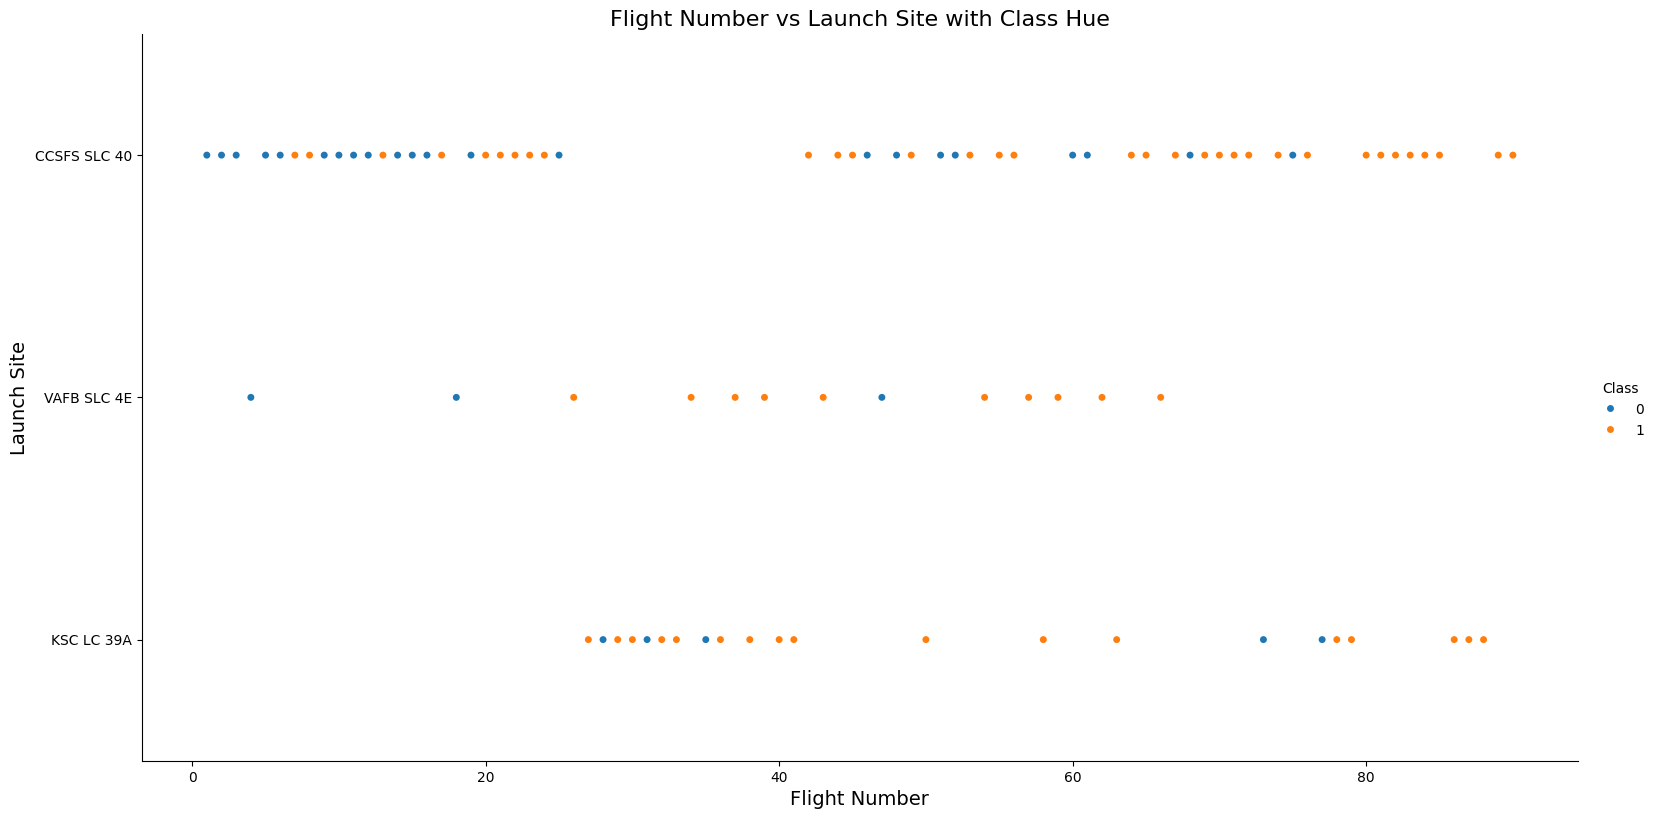

In [12]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Use catplot to plot FlightNumber vs LaunchSite with hue='Class'
sns.catplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, kind='swarm', height=8, aspect=2)

# Set labels and title
plt.xlabel('Flight Number', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.title('Flight Number vs Launch Site with Class Hue', fontsize=16)

# Show the plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


Here are some observations from the plot:

1. **CCAFS LC-40 Site:**
   - Initial launches had a mix of both successful and unsuccessful landings.
   - As Flight Number increased, there seems to be a pattern of improved success rates, indicating a learning curve or technological advancements over time.
   - In the later stages, there is a higher concentration of successful landings, suggesting increased reliability.

2. **KSC LC-39A Site:**
   - Starts with a few successful landings but experiences a higher success rate overall compared to CCAFS LC-40.
   - There is a visible pattern of success improvement with increasing Flight Number, similar to CCAFS LC-40.

3. **VAFB SLC 4E Site:**
   - Similar to CCAFS LC-40, starts with mixed success and failure.
   - The success rate improves over time with an increasing Flight Number.

These patterns suggest that over time, SpaceX has achieved better success rates, likely due to improvements in technology, experience gained from previous launches, and continuous learning.

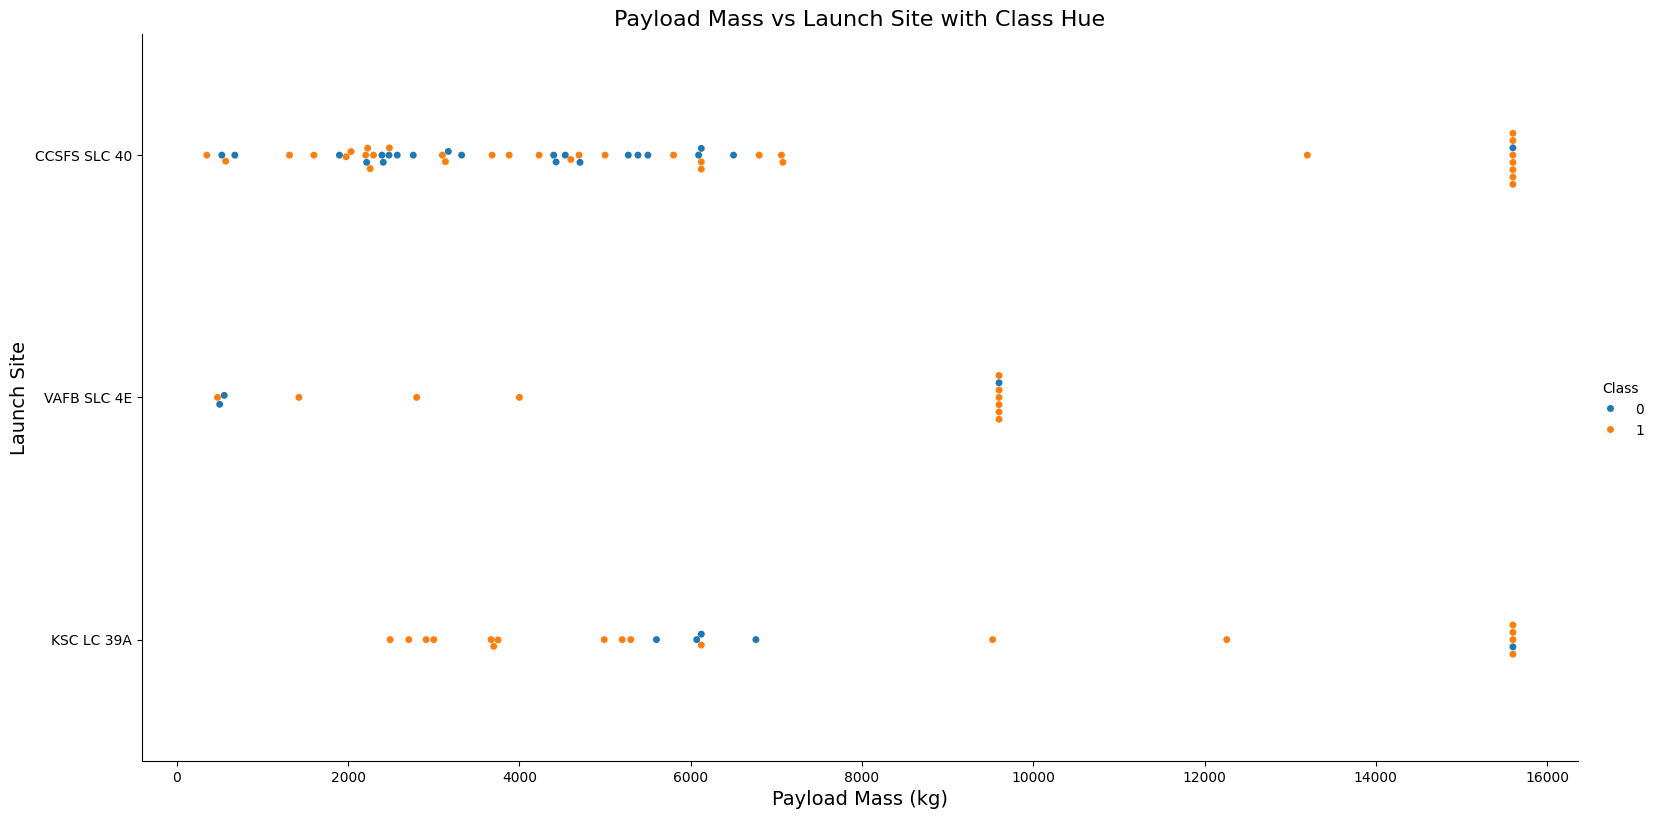

In [13]:
### TASK 2: Visualize the relationship between Payload and Launch Site
# Plot a scatter point chart with x axis as PayloadMass, y axis as LaunchSite, and hue as Class
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='swarm', height=8, aspect=2)

# Set labels and title
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.title('Payload Mass vs Launch Site with Class Hue', fontsize=16)

# Show the plot
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


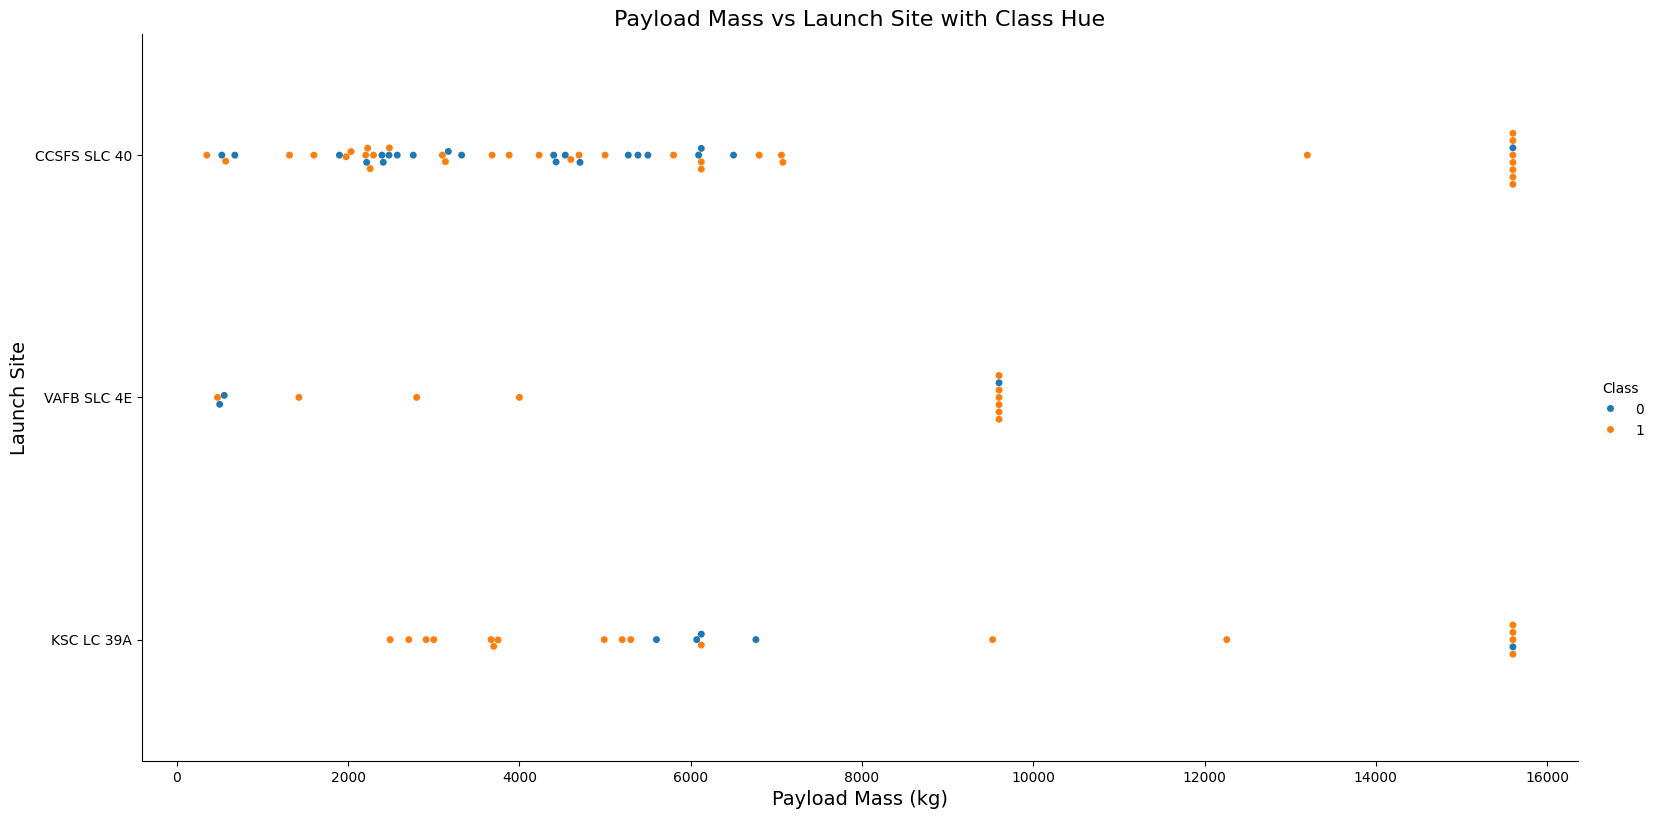

In [14]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, kind='swarm', height=8, aspect=2)

# Set labels and title
plt.xlabel('Payload Mass (kg)', fontsize=14)
plt.ylabel('Launch Site', fontsize=14)
plt.title('Payload Mass vs Launch Site with Class Hue', fontsize=16)

# Show the plot
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_12452\1727464456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=df, palette='viridis')


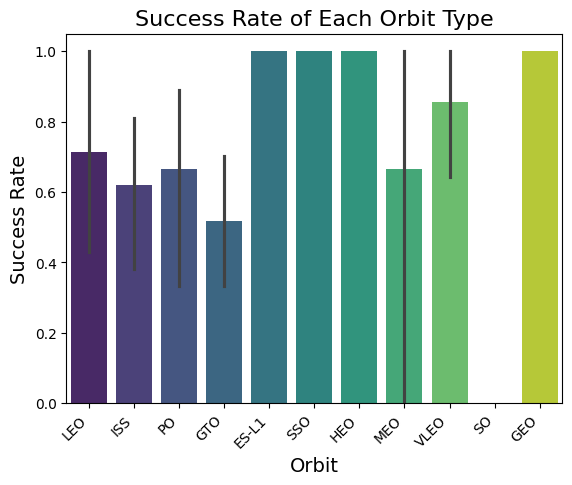

In [16]:
### TASK  3: Visualize the relationship between success rate of each orbit type

# Create a bar plot to visualize success rate for each orbit type
sns.barplot(x='Orbit', y='Class', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Orbit', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Success Rate of Each Orbit Type', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_12452\2882753963.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')


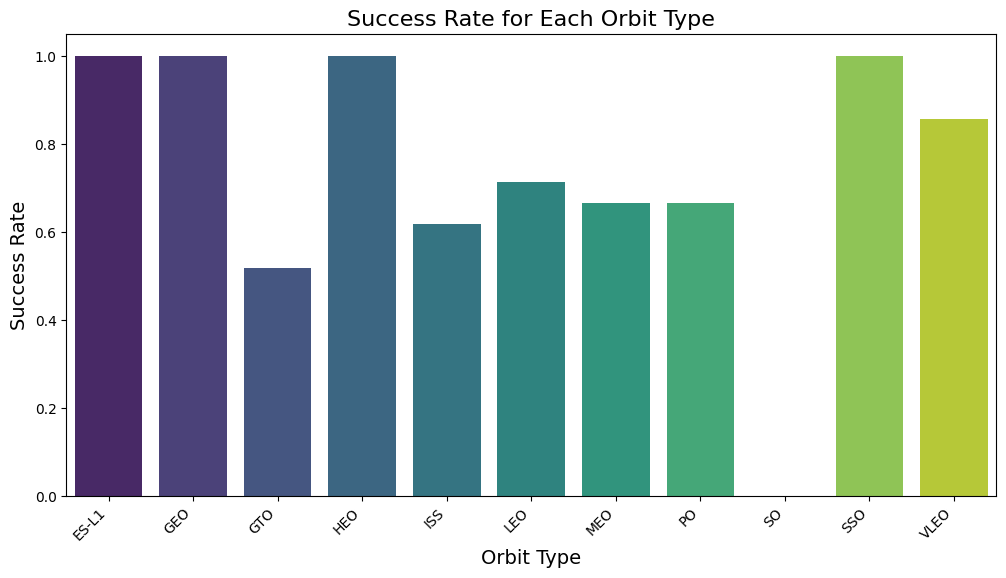

In [17]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')

# Set labels and title
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.title('Success Rate for Each Orbit Type', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Analyze the ploted bar chart try to find which orbits have high sucess rate.
Looking at the bar chart, you can observe that the orbits with high success rates are:

    ES-L1 (Earth-Sun L1): This orbit type has the highest success rate among the plotted orbits.

    GTO (Geostationary Transfer Orbit): GTO also shows a relatively high success rate.

These orbits seem to have a higher success rate compared to others. On the other hand, certain orbits like ISS (International Space Station) have a lower success rate.

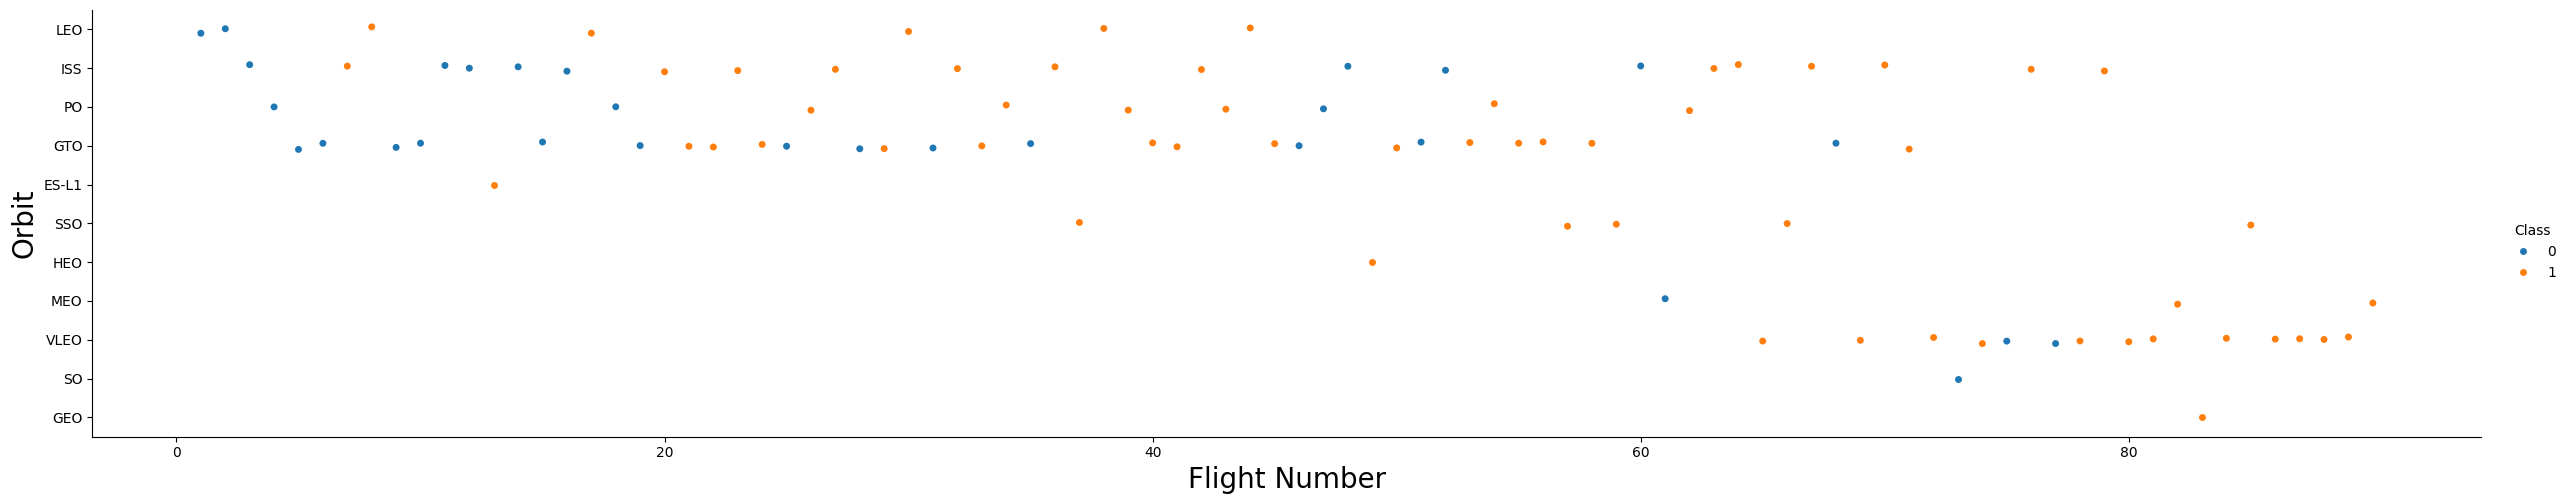

In [18]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the Orbit type, and hue to be the class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


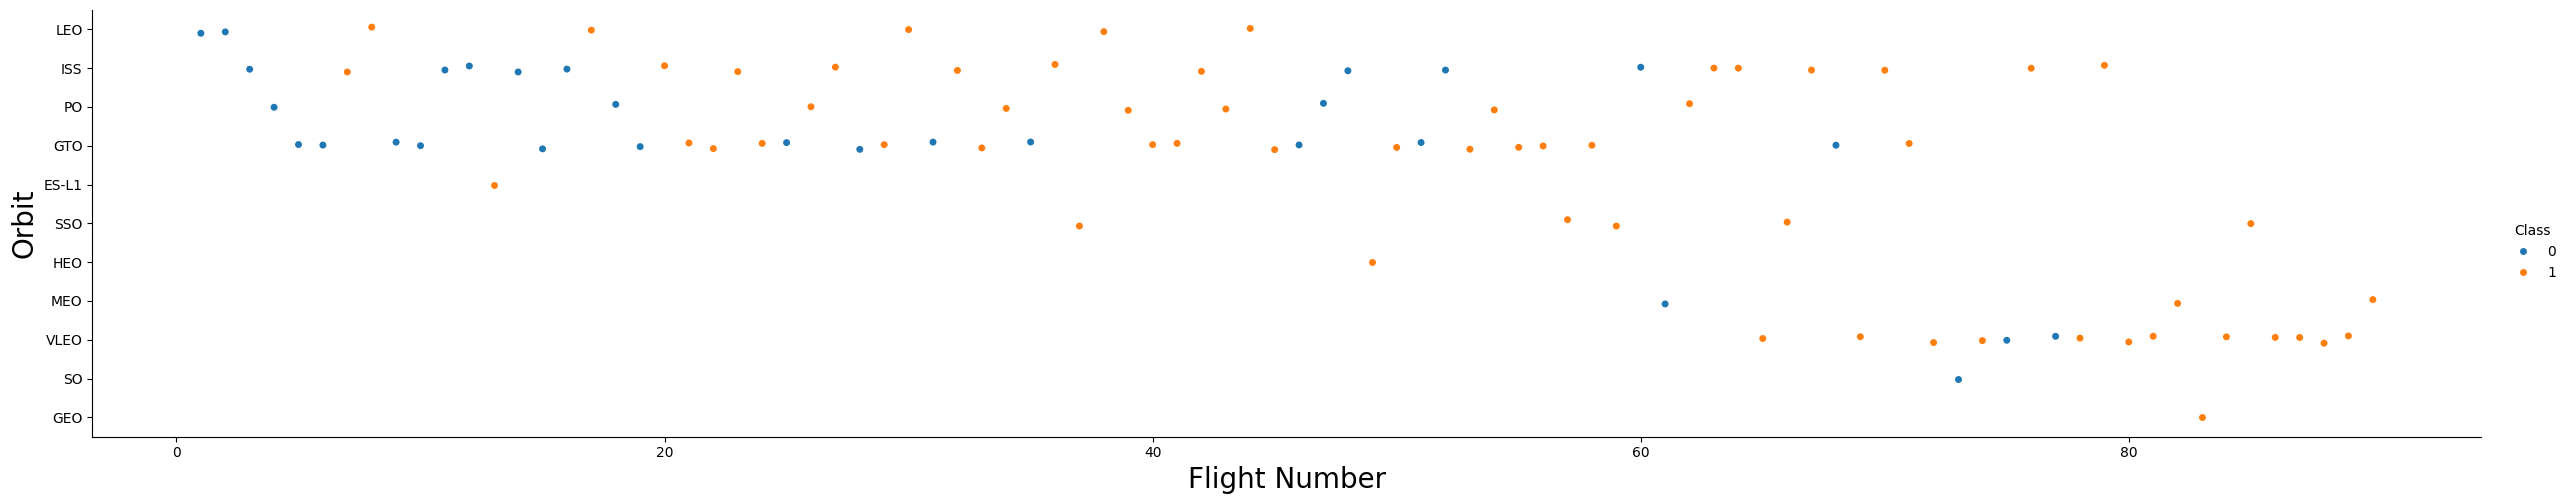

In [19]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Plot a scatter point chart with x axis as FlightNumber, y axis as Orbit, and hue as the Class value
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


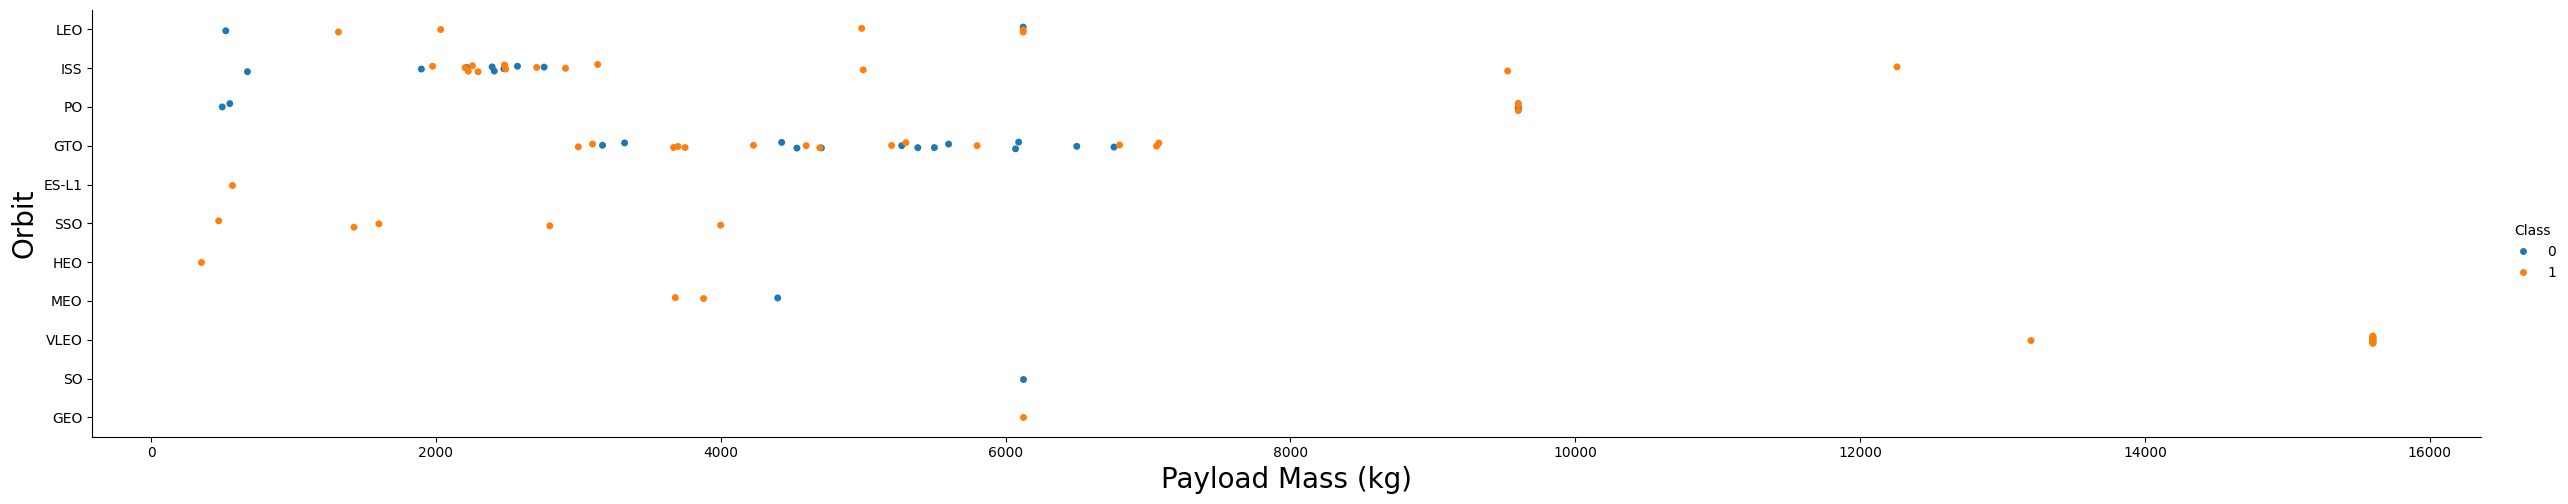

In [20]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Plot a scatter point chart with x axis as PayloadMass, y axis as Orbit, and hue as the Class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


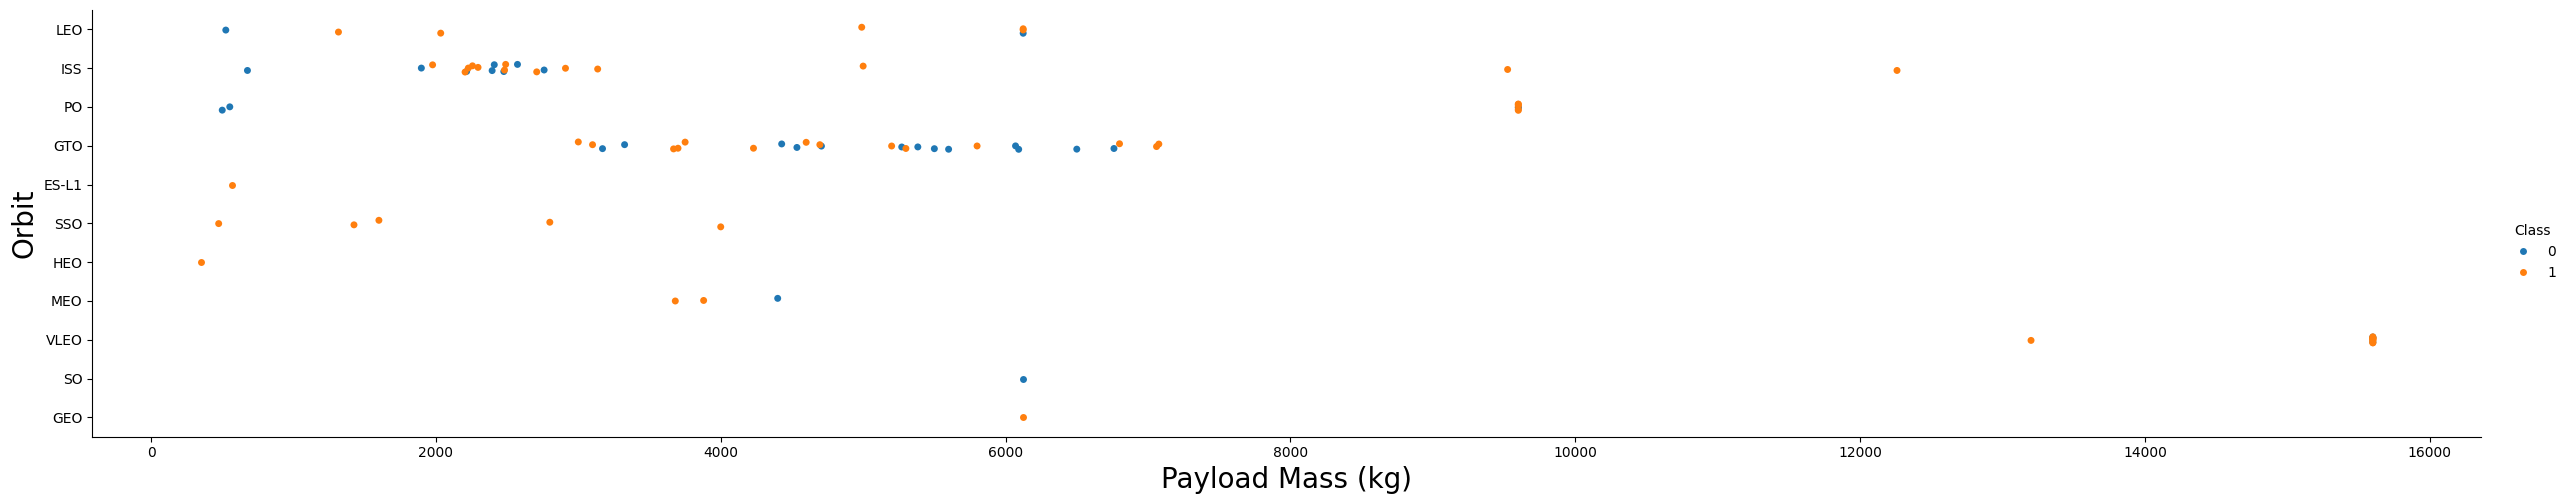

In [21]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Plot a scatter point chart with x axis as PayloadMass, y axis as Orbit, and hue as the Class value
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


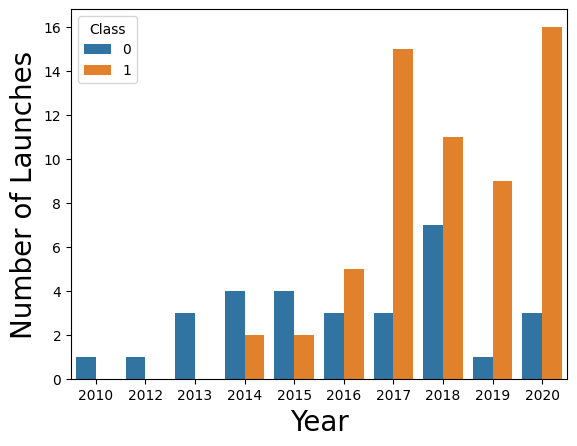

In [22]:
### TASK  6: Visualize the launch success yearly trend
# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Plot a bar chart with x axis as Year and y axis as the count of successful launches
sns.countplot(x="Year", hue="Class", data=df)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Number of Launches", fontsize=20)
plt.show()


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [23]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


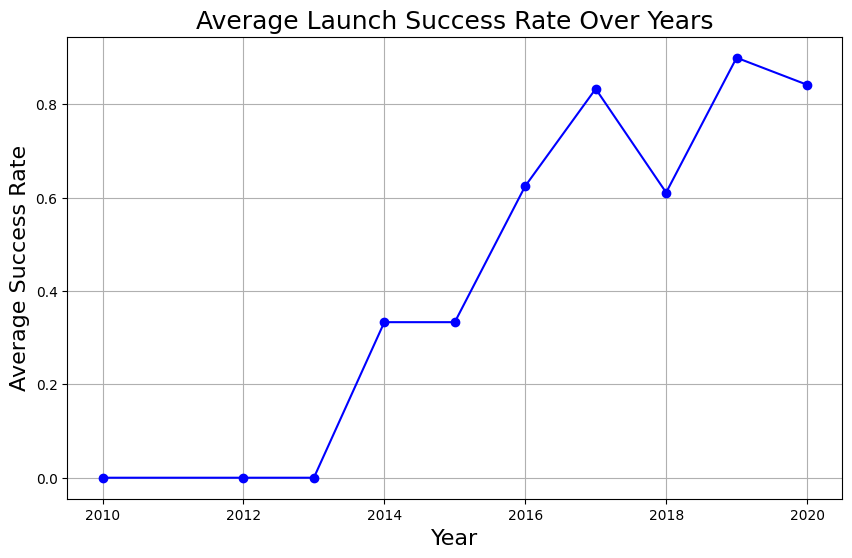

In [24]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Extract years from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate the average success rate for each year
success_rate_by_year = df.groupby('Year')['Class'].mean()

# Plot a line chart
plt.figure(figsize=(10, 6))
plt.plot(success_rate_by_year.index, success_rate_by_year, marker='o', linestyle='-', color='b')
plt.xlabel("Year", fontsize=16)
plt.ylabel("Average Success Rate", fontsize=16)
plt.title("Average Launch Success Rate Over Years", fontsize=18)
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [25]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [26]:
### TASK  7: Create dummy variables to categorical columns
# Selecting relevant features
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

# Create dummy variables for categorical columns
features = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Block', 'Serial'])

# Display the updated features DataFrame
features.head()



,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns

In [29]:
print(features.columns)


Index(['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs',
       'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCSFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E',
       'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Block_1.0', 'Block_2.0',
       'Block_3.0', 'Block_4.0', 'Block_5.0', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021',

In [33]:
### TASK  8: Cast all numeric columns to `float64`
# # Create dummy variables for categorical columns
# features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# # Cast all numeric columns to float64
# features_one_hot = features_one_hot.astype({'FlightNumber': 'float64', 'PayloadMass': 'float64', 'Flights': 'float64', 'GridFins': 'float64', 'Reused': 'float64', 'Legs': 'float64', 'Block': 'float64', 'ReusedCount': 'float64'})

# # Create dummy variables for categorical columns
# features_one_hot = pd.get_dummies(features, columns=['Orbit_LEO', 'Orbit_GTO', 'Orbit_OTHER', 'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034', 'Serial_B1035', 'Serial_B1036', 'Serial_B1037', 'Serial_B1038', 'Serial_B1039', 'Serial_B1040', 'Serial_B1041', 'Serial_B1042', 'Serial_B1043', 'Serial_B1044', 'Serial_B1045', 'Serial_B1046', 'Serial_B1047', 'Serial_B1048', 'Serial_B1049', 'Serial_B1050', 'Serial_B1051', 'Serial_B1054', 'Serial_B1056', 'Serial_B1058', 'Serial_B1059', 'Serial_B1060', 'Serial_B1062'])

# # Cast all numeric columns to float64
# features_one_hot = features_one_hot.astype({'FlightNumber': 'float64', 'PayloadMass': 'float64', 'Flights': 'float64', 'GridFins': 'float64', 'Reused': 'float64', 'Legs': 'float64', 'Block': 'float64', 'ReusedCount': 'float64'})

# # Create dummy variables for categorical columns
# features_one_hot = pd.get_dummies(features, columns=['Orbit_LEO', 'Orbit_GTO', 'Orbit_ISS', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034', 'Serial_B1035', 'Serial_B1036', 'Serial_B1037', 'Serial_B1038', 'Serial_B1039', 'Serial_B1040', 'Serial_B1041', 'Serial_B1042', 'Serial_B1043', 'Serial_B1044', 'Serial_B1045', 'Serial_B1046', 'Serial_B1047', 'Serial_B1048', 'Serial_B1049', 'Serial_B1050', 'Serial_B1051', 'Serial_B1054', 'Serial_B1056', 'Serial_B1058', 'Serial_B1059', 'Serial_B1060', 'Serial_B1062'])

# # Cast all numeric columns to float64
# features_one_hot = features_one_hot.astype({'FlightNumber': 'float64', 'PayloadMass': 'float64', 'Flights': 'float64', 'GridFins': 'float64', 'Reused': 'float64', 'Legs': 'float64', 'Block': 'float64', 'ReusedCount': 'float64'})

# Create dummy variables for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCSFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B1029', 'Serial_B1030', 'Serial_B1031', 'Serial_B1032', 'Serial_B1034', 'Serial_B1035', 'Serial_B1036', 'Serial_B1037', 'Serial_B1038', 'Serial_B1039', 'Serial_B1040', 'Serial_B1041', 'Serial_B1042', 'Serial_B1043', 'Serial_B1044', 'Serial_B1045', 'Serial_B1046', 'Serial_B1047', 'Serial_B1048', 'Serial_B1049', 'Serial_B1050', 'Serial_B1051', 'Serial_B1054', 'Serial_B1056', 'Serial_B1058', 'Serial_B1059', 'Serial_B1060', 'Serial_B1062'])

# Cast all numeric columns to float64 (excluding 'Block')
features_one_hot = features_one_hot.astype({'FlightNumber': 'float64', 'PayloadMass': 'float64', 'Flights': 'float64', 'GridFins': 'float64', 'Reused': 'float64', 'Legs': 'float64', 'ReusedCount': 'float64'})


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [34]:
# HINT: use astype function
# Cast the entire dataframe to float64
features_one_hot = features_one_hot.astype('float64')


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [35]:
features_one_hot.to_csv('data\dataset_part_3.csv', index=False)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_12452\4237321073.py:1: SyntaxWarning: invalid escape sequence '\d'
  features_one_hot.to_csv('data\dataset_part_3.csv', index=False)


In [36]:
# Count the total number of columns in the features_one_hot dataframe
total_columns_after_encoding = len(features_one_hot.columns)
print("Total number of columns after one-hot encoding:", total_columns_after_encoding)


Total number of columns after one-hot encoding: 156
